In [ ]:
!pip install nsepy


In [ ]:
!pip install arch

In [73]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
import plotly.express as px
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import numpy as np
import math
import random

import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

In [2]:
start = dt.datetime(2013,11,1)
end = dt.datetime(2023,3,23)
stk_data = gh(symbol='ASHOKLEY',start=start,end=end)
     

stk_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2013-11-01,ASHOKLEY,EQ,17.20,17.30,17.90,17.15,17.85,17.80,17.51,6491008,1.136365e+13,12742,2818276,0.4342
2013-11-03,ASHOKLEY,EQ,17.80,18.00,18.25,17.65,18.10,18.05,18.00,4676385,8.418104e+12,8649,1167525,0.2497
2013-11-05,ASHOKLEY,EQ,18.05,18.00,18.90,17.50,18.40,18.45,18.37,15861200,2.913826e+13,24553,4848856,0.3057
2013-11-06,ASHOKLEY,EQ,18.45,18.20,18.30,17.65,17.75,17.70,17.87,13672905,2.442770e+13,17113,3514256,0.2570
2013-11-07,ASHOKLEY,EQ,17.70,17.80,17.80,16.75,16.85,16.80,17.11,16286717,2.786706e+13,20271,5005701,0.3073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-17,ASHOKLEY,EQ,139.75,140.50,141.40,138.60,139.60,139.50,139.73,5322993,7.437821e+13,34288,2182219,0.4100
2023-03-20,ASHOKLEY,EQ,139.50,139.50,139.75,135.40,136.00,135.95,136.40,11494041,1.567837e+14,50216,7339167,0.6385
2023-03-21,ASHOKLEY,EQ,135.95,136.25,137.30,135.15,135.50,135.40,135.94,6947802,9.445141e+13,43946,3017341,0.4343


## Given a day of week, what's the probability that the Stock Price that day will go Up or Down?

#### Using Bayes theorem to answer the same.

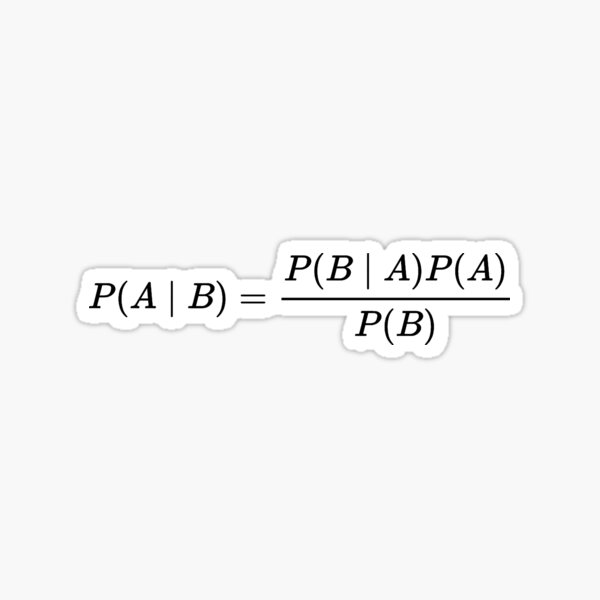

In [134]:
stk_data.index

Index([2013-11-01, 2013-11-03, 2013-11-05, 2013-11-06, 2013-11-07, 2013-11-08,
       2013-11-11, 2013-11-12, 2013-11-13, 2013-11-14,
       ...
       2023-03-10, 2023-03-13, 2023-03-14, 2023-03-15, 2023-03-16, 2023-03-17,
       2023-03-20, 2023-03-21, 2023-03-22, 2023-03-23],
      dtype='object', name='Date', length=2324)

In [68]:
stk_data['day_of_week']=pd.to_datetime(list(stk_data.index)).strftime('%A')

C:\Users\Ayan.Sardar\AppData\Local\Temp\ipykernel_4508\2852546601.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



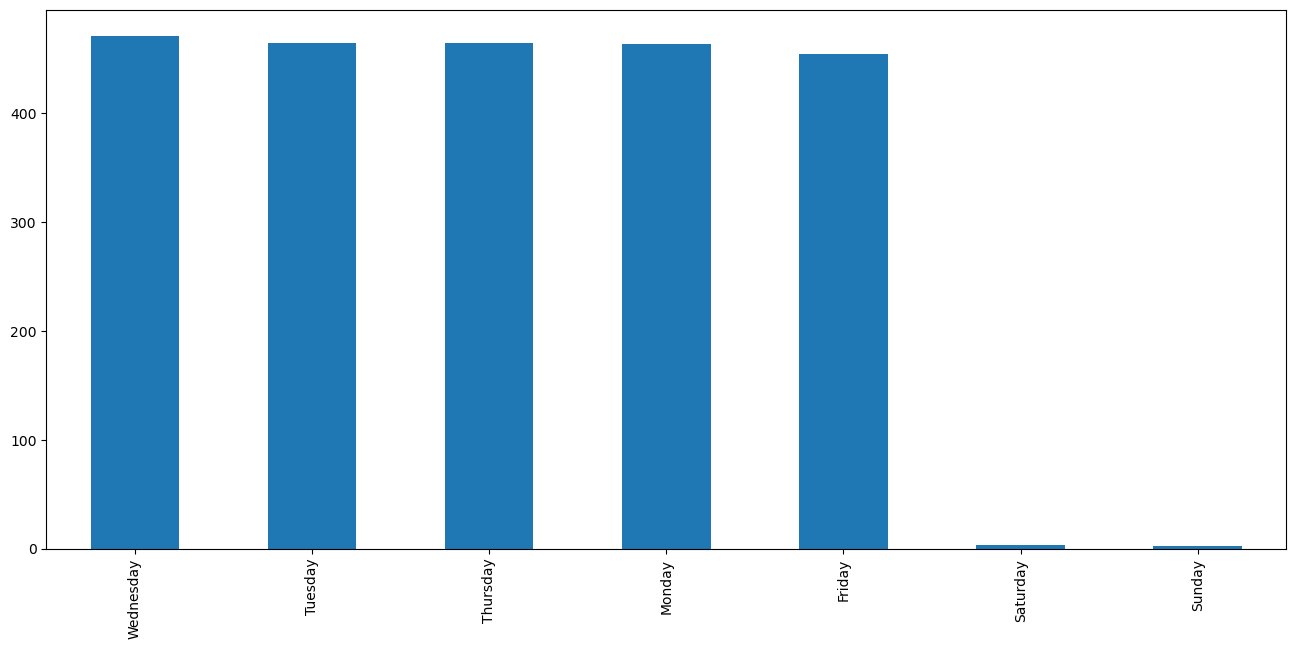

In [69]:
stk_data['day_of_week'].value_counts().plot(kind='bar',figsize=(16,7));

In [8]:
stk_data['pct_change']=stk_data.Close.pct_change()
stk_data=stk_data[['Close','day_of_week','pct_change']]
stk_data['Trend']=stk_data['pct_change'].apply(lambda x: 'Up' if x>0 else 'Down')
stk_data.dropna(inplace=True)

C:\Users\Ayan.Sardar\AppData\Local\Temp\ipykernel_4508\2329575855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stk_data['Trend']=stk_data['pct_change'].apply(lambda x: 'Up' if x>0 else 'Down')
C:\Users\Ayan.Sardar\AppData\Local\Temp\ipykernel_4508\2329575855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stk_data.dropna(inplace=True)


(array([1.000e+00, 1.000e+00, 3.000e+00, 3.700e+01, 9.000e+02, 1.285e+03,
        8.600e+01, 8.000e+00, 1.000e+00, 1.000e+00]),
 array([-0.25214008, -0.20254291, -0.15294573, -0.10334856, -0.05375139,
        -0.00415422,  0.04544295,  0.09504012,  0.1446373 ,  0.19423447,
         0.24383164]),
 <BarContainer object of 10 artists>)

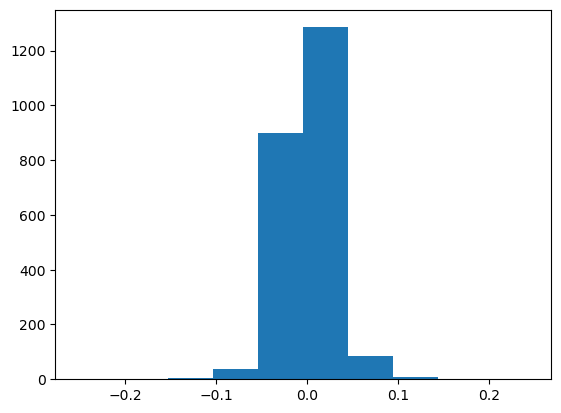

In [9]:
plt.hist(stk_data['pct_change'])

In [10]:
stk_data

,Close,day_of_week,pct_change,Trend
Date,,,,
2013-11-03,18.05,Sunday,0.014045,Up
2013-11-05,18.45,Tuesday,0.022161,Up
2013-11-06,17.70,Wednesday,-0.040650,Down
2013-11-07,16.80,Thursday,-0.050847,Down
2013-11-08,16.95,Friday,0.008929,Up
...,...,...,...,...
2023-03-17,139.50,Friday,-0.001789,Down
2023-03-20,135.95,Monday,-0.025448,Down
2023-03-21,135.40,Tuesday,-0.004046,Down


#### Dry trial when Day of the Week= Monday

P(Up | Monday) = (P(Monday | Up) * P(Up))/P(Monday)

In [158]:
stk_monday_up=len(stk_data[(stk_data['day_of_week']=='Monday') & (stk_data['Trend']=='Up')])

stk_up=len(stk_data[stk_data['Trend']=='Up'])


probability_monday_given_stock_up=(stk_monday_up/stk_up)

In [159]:
probability_monday_given_stock_up

0.20728534258456202

In [177]:
stk_monday_up=len(stk_data[(stk_data['day_of_week']=='Tuesday') & (stk_data['Trend']=='Up')])

stk_up=len(stk_data[stk_data['Trend']=='Up'])


probability_monday_given_stock_up=(stk_monday_up/stk_up)

In [178]:
probability_monday_given_stock_up

0.20728534258456202

In [160]:
probability_of_stock_up=(stk_up/len(stk_data[1:]))

In [161]:
probability_of_monday=len(stk_data[stk_data['day_of_week']=='Monday'])/len(stk_data)

In [162]:
probability_of_up_given_monday=(probability_monday_given_stock_up * probability_of_stock_up)/probability_of_monday

In [163]:
probability_of_up_given_monday

0.5164210119004433

In [204]:
def calc_bayesian_probabs(day,trend):
    
    """
    Function to calculate and print out the corresponding
    probabilities of Up/Down for each day of
    the week
    
    """
    
    stk_day_up=len(stk_data[(stk_data['day_of_week']==day) & (stk_data['Trend']==trend)])

    stk_up=len(stk_data[stk_data['Trend']==trend])
    probability_day_given_stock_up=(stk_day_up/stk_up)
    
    probability_of_stock_up=(stk_up/len(stk_data[1:]))
    probability_of_day=len(stk_data[stk_data['day_of_week']==day])/len(stk_data)
    probability_of_up_given_day=(probability_day_given_stock_up * probability_of_stock_up)/probability_of_day
    
    return f'If the day of the week is {day}, the probabiity of the stock going {trend} is {np.round((probability_of_up_given_day*100),2)}'
    

In [203]:
day_of_weeks=['Monday','Tuesday','Wednesday','Thursday','Friday']

for day in day_of_weeks:
    
    print('_____________________________________________________________________________________________________________')
    
    print()
    
    print(calc_bayesian_probabs(day,'Up'))
    print(calc_bayesian_probabs(day,'Down'))
    
    print('______________________________________________________________________________________________________________')
    


_____________________________________________________________________________________________________________

If the day of the week is Monday, the probabiity of the stock going Up is 51.64
If the day of the week is Monday, the probabiity of the stock going Down is 48.4
______________________________________________________________________________________________________________
_____________________________________________________________________________________________________________

If the day of the week is Tuesday, the probabiity of the stock going Up is 51.53
If the day of the week is Tuesday, the probabiity of the stock going Down is 48.51
______________________________________________________________________________________________________________
_____________________________________________________________________________________________________________

If the day of the week is Wednesday, the probabiity of the stock going Up is 48.43
If the day of the week is Wednesday, 

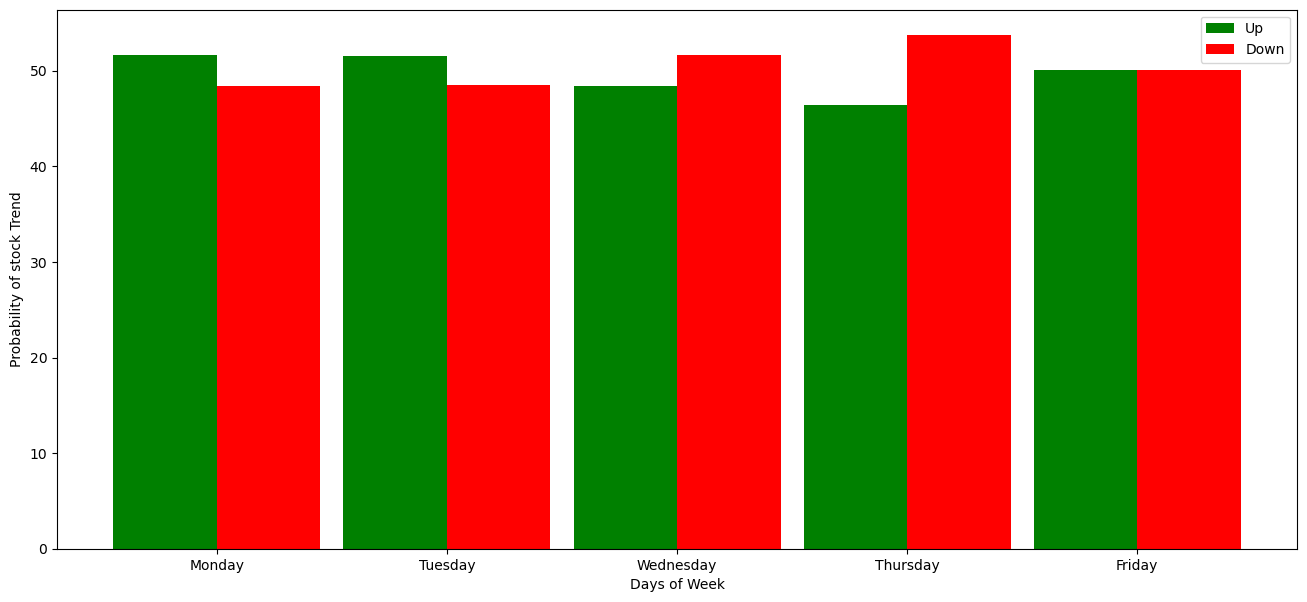

In [215]:
categories=['Monday','Tuesday','Wednesday','Thursday','Friday']
value1=[51.64,51.53,48.43,46.36,50.02]
value2 = [48.4,48.51,51.61,53.69,50.02]


bar_width = 0.45
x_pos = [i for i, _ in enumerate(categories)]

plt.figure(figsize=(16,7))
plt.bar(x_pos, value1, width=bar_width, color='Green', label='Up')
plt.bar([i + bar_width for i in x_pos], value2, width=bar_width, color='Red', label='Down')
plt.xlabel('Days of Week')
plt.ylabel('Probability of stock Trend')
plt.xticks([i + bar_width / 2 for i in x_pos], categories)
plt.legend()
plt.show()

## What's the average 30-day return that can be expected from this stock?

#### Using Monte Carlo Simulation, simulating a stratergy of buying and selling the stock on a window of 30 days and calculating the returns

In [11]:
stk_data

,Close,day_of_week,pct_change,Trend
Date,,,,
2013-11-03,18.05,Sunday,0.014045,Up
2013-11-05,18.45,Tuesday,0.022161,Up
2013-11-06,17.70,Wednesday,-0.040650,Down
2013-11-07,16.80,Thursday,-0.050847,Down
2013-11-08,16.95,Friday,0.008929,Up
...,...,...,...,...
2023-03-17,139.50,Friday,-0.001789,Down
2023-03-20,135.95,Monday,-0.025448,Down
2023-03-21,135.40,Tuesday,-0.004046,Down


In [45]:
def simulate_random_buy_sell(no_days,num_sims):
    
    """"
    Function that selects a random day, calculates
    returns after set no of days mentioned in no_days,
    num_sims number of times 
    
    """
    
    returns=[]
    count=0
    
    while count!=num_sims:
        rand_start_date=random.choice(list(stk_data.index))
        end_date = pd.to_datetime(rand_start_date) + pd.Timedelta(days=no_days)
    
        to_simulate_data=stk_data.loc[rand_start_date:end_date]
    
        tot_return=np.sum(to_simulate_data['pct_change'])
    
        returns.append(tot_return*100)
        
        count+=1
    return returns
    
    

#### Simulating 30 day return, 10000 times

In [53]:
stock_return=simulate_random_buy_sell(30,10000)

C:\Users\Ayan.Sardar\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1541: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

C:\Users\Ayan.Sardar\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:3629: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



In [74]:
fig=px.histogram(stock_return)
pyo.iplot(fig)

In [75]:
fig=px.box(stock_return)
pyo.iplot(fig)

#### Simulating 365 days return, 10000 times

In [57]:
stock_return=simulate_random_buy_sell(365,10000)

C:\Users\Ayan.Sardar\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:3629: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

C:\Users\Ayan.Sardar\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1541: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



In [76]:
fig=px.histogram(stock_return)
pyo.iplot(fig)

In [77]:
fig=px.box(stock_return)
pyo.iplot(fig)

## Simulating 2 year return, 10000 times

In [60]:
stock_return=simulate_random_buy_sell(730,10000)

C:\Users\Ayan.Sardar\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:3629: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

C:\Users\Ayan.Sardar\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1541: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



In [78]:
fig=px.histogram(stock_return)
pyo.iplot(fig)

In [79]:
fig=px.box(stock_return)
pyo.iplot(fig)

### As expected from penny stocks, this stock provides better long-term returns

In [20]:
stk_data.loc[rand_date]

Close             63.65
day_of_week      Friday
pct_change     0.017586
Trend                Up
Name: 2019-08-16, dtype: object

## Which are the months which show more deviation/fluctuation as compared to other months?

In [70]:
month_deviations = stk_data['Close'].groupby(lambda d: d.strftime('%B')).std()


In [81]:
fig=px.line(x=month_deviations.index,y=month_deviations.values)
pyo.iplot(fig)

### Clearly April is the month with the most fluctuations and October is the least.

In [83]:
day_deviations = stk_data['Close'].groupby(lambda d: d.strftime('%A')).std()

In [89]:
day_deviations

Date
Friday       36.072101
Monday       36.214417
Saturday     31.741272
Sunday       38.630687
Thursday     36.033237
Tuesday      36.294437
Wednesday    36.251411
Name: Close, dtype: float64

In [84]:
fig=px.line(x=day_deviations.index,y=day_deviations.values)
pyo.iplot(fig)

# Volatility Modelling using GARCH

In [90]:
returns = 100 * stk_data.Close.pct_change().dropna()

In [91]:
returns.values

array([ 2.21606648, -4.06504065, -5.08474576, ..., -0.4045605 ,
        2.47415066, -1.04504505])

Text(0.5, 1.0, 'DIS Returns')

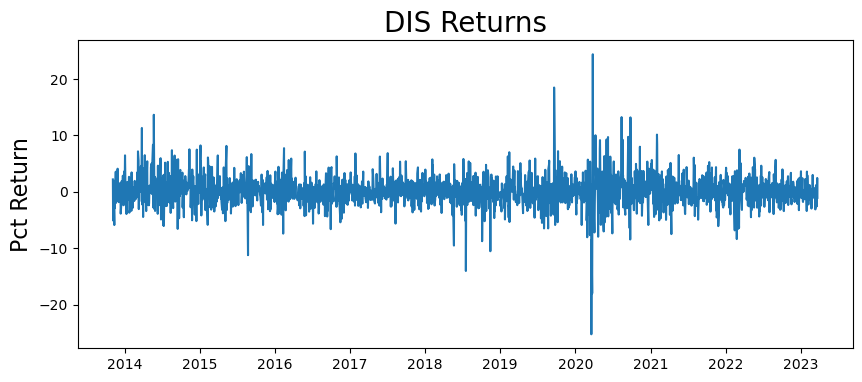

In [92]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

C:\Users\Ayan.Sardar\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



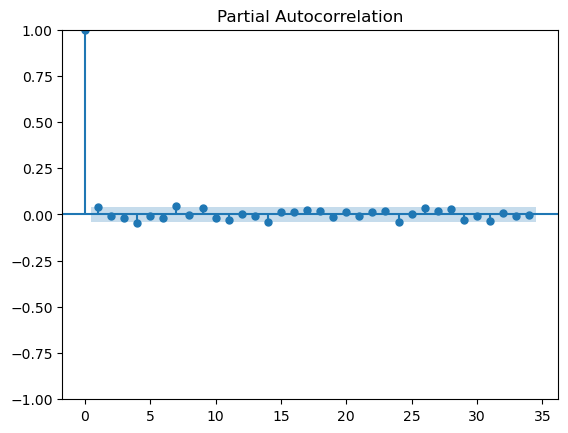

In [93]:
plot_pacf(returns.values)
plt.show()

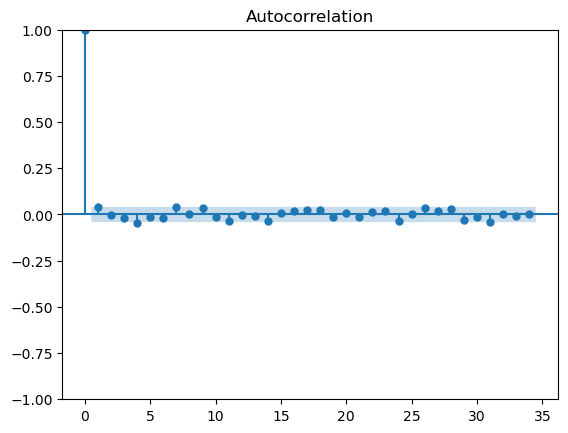

In [94]:
plot_acf(returns.values)
plt.show()

### Trying GARCH (1,1), since we dont really have lags which are majorly significant

In [95]:
model = arch_model(returns, p=1, q=1)

In [96]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1306700861.2989717
Iteration:      2,   Func. Count:     14,   Neg. LLF: 6780.322320225803
Iteration:      3,   Func. Count:     21,   Neg. LLF: 5623.154851790157
Iteration:      4,   Func. Count:     28,   Neg. LLF: 10371.568764870219
Iteration:      5,   Func. Count:     36,   Neg. LLF: 5398.721682933123
Iteration:      6,   Func. Count:     41,   Neg. LLF: 5398.419723760915
Iteration:      7,   Func. Count:     46,   Neg. LLF: 5398.333951254564
Iteration:      8,   Func. Count:     51,   Neg. LLF: 5398.3270555959725
Iteration:      9,   Func. Count:     56,   Neg. LLF: 5398.32695289393
Iteration:     10,   Func. Count:     60,   Neg. LLF: 5398.326952890509
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5398.32695289393
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10


In [97]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5398.33
Distribution:                  Normal   AIC:                           10804.7
Method:            Maximum Likelihood   BIC:                           10827.7
                                        No. Observations:                 2322
Date:                Fri, Mar 31 2023   Df Residuals:                     2321
Time:                        11:03:34   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1354  4.935e-02      2.744  6.063e-03 [3.871e-02,  0.232]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.3313      0.209      1.585      0.113 [-7.831e-02,  0.741]
alpha[1]       0.0894  3.801e-02      2.351  1.870e-02  [1.488e-02,  0.164]
beta[1]        0.8645  6.246e-02     13.841  1.447e-43    [  0.742,  0.987]
===========================================================================

Covariance estimator: robust
"""

In [112]:
returns

Date
2013-11-03    1.404494
2013-11-05    2.216066
2013-11-06   -4.065041
2013-11-07   -5.084746
2013-11-08    0.892857
                ...   
2023-03-17   -0.178891
2023-03-20   -2.544803
2023-03-21   -0.404561
2023-03-22    2.474151
2023-03-23   -1.045045
Name: Close, Length: 2323, dtype: float64

In [113]:
pred.variance.values

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [4.103247  , 4.24454575, 4.37937356, ..., 4.63078815, 4.74792753,
        4.85970236]])

In [114]:

rolling_predictions = []
test_size = 365*3

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [115]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*3:])

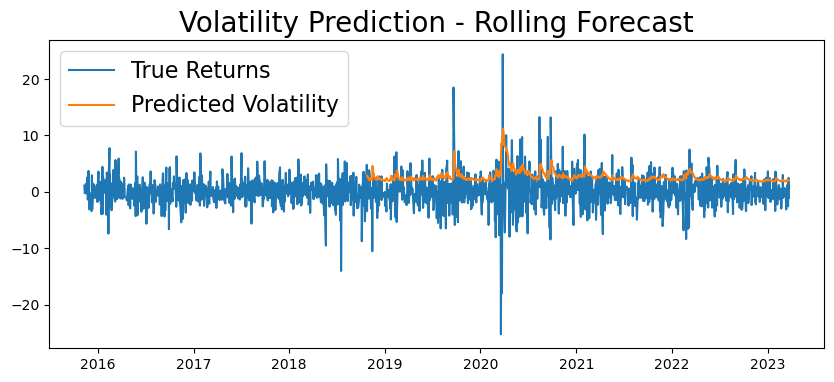

In [116]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# Seems like the model has done a decent job in capturing the volatility!

In [101]:
pred=model_fit.forecast(horizon=70)

C:\Users\Ayan.Sardar\Anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning:


The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.




In [102]:
pred

In [103]:
pred.variance.values[-1,:]

array([4.10587997, 4.24777621, 4.38312689, 4.51223395, 4.63538539,
       4.75285596, 4.86490769, 4.97179057, 5.07374302, 5.17099249,
       5.26375591, 5.35224022, 5.43664283, 5.517152  , 5.59394735,
       5.66720019, 5.73707393, 5.80372445, 5.86730043, 5.9279437 ,
       5.98578954, 6.040967  , 6.09359917, 6.14380345, 6.19169185,
       6.23737119, 6.28094338, 6.32250562, 6.36215063, 6.39996684,
       6.43603862, 6.47044643, 6.50326704, 6.53457366, 6.56443613,
       6.59292107, 6.62009201, 6.64600959, 6.6707316 , 6.69431321,
       6.71680702, 6.7382632 , 6.75872963, 6.77825196, 6.79687373,
       6.8146365 , 6.83157989, 6.84774169, 6.86315796, 6.87786308,
       6.89188988, 6.90526962, 6.91803217, 6.93020599, 6.94181825,
       6.95289484, 6.96346047, 6.97353872, 6.98315207, 6.99232196,
       7.00106885, 7.00941226, 7.01737079, 7.0249622 , 7.03220342,
       7.03911061, 7.04569918, 7.05198382, 7.05797856, 7.06369676])